In [1]:
import numpy as np
import pandas as pd
from LinearRegression import LinearRegressor
import matplotlib.pyplot as plt

In [2]:
attributes = ['Cement','Slag','Fly ash','Water','SP','Coarse Aggr','Fine Aggr','SLUMP']

df_train = pd.read_csv('../data/concrete/train.csv', names=attributes)
df_test = pd.read_csv('../data/concrete/test.csv', names=attributes)

In [3]:
X = df_train.loc[:, df_train.columns != 'SLUMP'].to_numpy(dtype='float64')
y = df_train['SLUMP'].to_numpy(dtype='float64')

regressor = LinearRegressor(X, y)

In [5]:
X_test = df_test.loc[:, df_test.columns != 'SLUMP'].to_numpy(dtype='float64')
y_test = df_test['SLUMP'].to_numpy(dtype='float64')

bias_col = np.ones(X_test.shape[0])
X_test = np.c_[X_test, bias_col]

In [7]:
#Test Gradient Descent
regressor = LinearRegressor(X, y)
r = 0.01
regressor.gradient_descent(r)
cost = [(y_test[idx] - (regressor.w.T @ X_test[idx]))**2 for idx in range(X_test.shape[0])]
cost = 0.5 * sum(cost)

Learning rate: 0.010000
Weight Vector:
[0.9002 0.7859 0.8507 1.2986 0.1298 1.5718 0.9983]
Bias: -0.015204
Testing cost: 23.361305


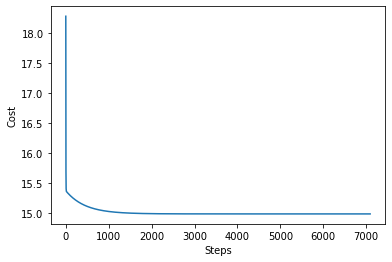

In [8]:
print('Learning rate: %f' % r)
print('Weight Vector:')
with np.printoptions(precision=4, suppress=True):
    print(regressor.w[:-1])
print('Bias: %f' % regressor.w[-1])
print('Testing cost: %f' % cost)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.plot(regressor.costs)
plt.title('Gradient Descent Cost')
plt.xlabel('Steps')
plt.ylabel('Cost')
plt.show()

In [10]:
#Test Stochastic Gradient Descent
regressor = LinearRegressor(X, y)
r = 0.003
num_iterations = 100
regressor.stochastic_gradient_descent(r, num_iterations)
cost = [(y_test[idx] - (regressor.w.T @ X_test[idx]))**2 for idx in range(X_test.shape[0])]
cost = 0.5 * sum(cost)

In [1]:
print('Learning rate: %f' % r)
print('Weight Vector:')
with np.printoptions(precision=4, suppress=True):
    print(regressor.w[:-1])
print('Bias: %f' % regressor.w[-1])
print('Testing cost: %f' % cost)

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.plot(regressor.costs)
plt.title('Stochastic Gradient Descent Cost')
plt.xlabel('Steps')
plt.ylabel('Cost')
plt.show()

NameError: name 'r' is not defined

In [12]:
#Analytical calculation
bias_col = np.ones(X.shape[0])
X1 = np.c_[X, bias_col]
optimal_w = np.linalg.inv(X1.T @ X1) @ X1.T @ y.T

print('Optimal weight vector:')
with np.printoptions(precision=4, suppress=True):
    print(optimal_w[:-1])
print('Optimal Bias: %f' % optimal_w[-1])

Optimal weight vector:
[0.9006 0.7863 0.851  1.2989 0.1299 1.5722 0.9987]
Optimal Bias: -0.015197
